In [69]:
# Initial imports
import os
import requests
import plotly.express as px
import pandas as pd
import pandas_montecarlo
from pathlib import Path
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.animation as ani
from matplotlib import animation


import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
#Set Params for plot in workbook 

plt.rcParams["figure.figsize"] = (11,6)


In [71]:
# Import Covid Data 
covid_data = Path("covid_cases_by_location.csv")
covid_data = pd.read_csv(covid_data, parse_dates=True, infer_datetime_format=True)

In [72]:
#view pd dataframe 
covid_data.head()

,notification_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19
0,2020-01-25,2134,X700,Sydney,11300,Burwood (A)
1,2020-01-25,2121,X760,Northern Sydney,16260,Parramatta (C)
2,2020-01-25,2071,X760,Northern Sydney,14500,Ku-ring-gai (A)
3,2020-01-27,2033,X720,South Eastern Sydney,16550,Randwick (C)
4,2020-03-01,2163,X710,South Western Sydney,12850,Fairfield (C)


In [73]:
#Set notification_date as index 

covid_data['notification_date'] = pd.to_datetime(covid_data['notification_date'])

covid_data = covid_data.set_index('notification_date')

#covid_data.drop(['notification_date'], axis =1)
covid_data

,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19
notification_date,,,,,
2020-01-25,2134,X700,Sydney,11300,Burwood (A)
2020-01-25,2121,X760,Northern Sydney,16260,Parramatta (C)
2020-01-25,2071,X760,Northern Sydney,14500,Ku-ring-gai (A)
2020-01-27,2033,X720,South Eastern Sydney,16550,Randwick (C)
2020-03-01,2163,X710,South Western Sydney,12850,Fairfield (C)
...,...,...,...,...,...
2021-08-31,2165,X710,South Western Sydney,12850,Fairfield (C)
2021-08-31,2500,X730,Illawarra Shoalhaven,18450,Wollongong (C)
2021-08-31,2142,X740,Western Sydney,12380,Cumberland (A)


In [74]:
#Create Covid count by day
covid_by_day = covid_data['postcode'].groupby(covid_data['postcode'].index.date).count()

covid_by_day

2020-01-25       3
2020-01-27       1
2020-03-01       2
2020-03-02       3
2020-03-03       6
              ... 
2021-08-27    1135
2021-08-28    1135
2021-08-29    1212
2021-08-30    1099
2021-08-31     941
Name: postcode, Length: 526, dtype: int64

[Text(0, 0.5, 'Number of Cases'), Text(0.5, 0, 'Days')]

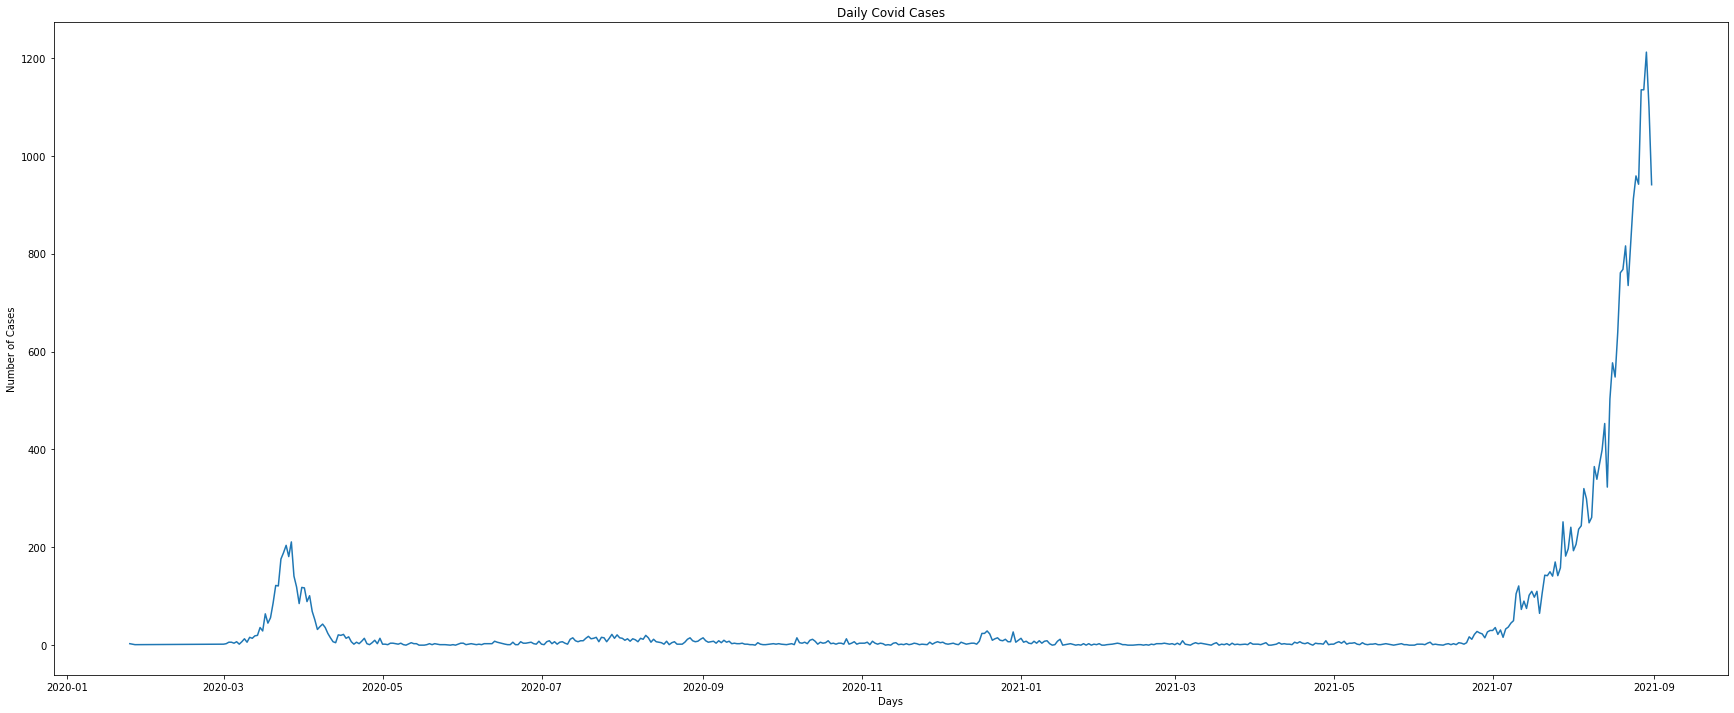

In [75]:
#Graph Covid_by_data data 

covid_count_plt = covid_by_day.plot(figsize=(30,12), title='Daily Covid Cases')

covid_count_plt.set(ylabel='Number of Cases', xlabel='Days')

#plt.axhline(y=0.0, color='g', alpha=0.5, linestyle='--')  
#plt.show()

In [76]:
df = pd.DataFrame(covid_by_day)
df.columns = ['Daily_Cases']

df['Date']=pd+.to_datetime(covid_by_day['Date'])


,Daily_Cases
2020-01-25,3
2020-01-27,1
2020-03-01,2
2020-03-02,3
2020-03-03,6
...,...
2021-08-27,1135
2021-08-28,1135
2021-08-29,1212
2021-08-30,1099


In [14]:
covid_by_day

2020-01-25       3
2020-01-27       1
2020-03-01       2
2020-03-02       3
2020-03-03       6
              ... 
2021-08-27    1135
2021-08-28    1135
2021-08-29    1212
2021-08-30    1099
2021-08-31     941
Name: postcode, Length: 526, dtype: int64

In [15]:
# Determine the Standard Deviation for the last 14 days of Covid Data 
covid_by_day['Change']= covid_by_day.pct_change().fillna(0)
std_14 = covid_by_day['Change'].tail(14).std()
std_14

0.1091329154856369

In [16]:
#This is the mean over the last 14 days of actual data 
mean_14 = covid_by_day['Change'].tail(14).mean()
mean_14

0.04477503539839672

In [17]:
#Set variables for MC Sim for 14 days 

projected_days = 14   #number of days to project out from last day of actual data

num_simulations = 20 #number of simulations required 


daily_changes = np.random.normal(mean_14,std_14,(projected_days,num_simulations))


In [18]:
#Create projection dataframe 
projection = pd.DataFrame((daily_changes + 1).cumprod(axis = 0) * 941)
projection

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1124.273821,948.326692,1069.618090,1005.833899,1141.454228,748.479453,949.074579,851.016434,1053.730245,1024.197206,844.112827,1043.173080,1046.324473,1067.660053,960.034471,954.914976,867.901125,1094.245036,1009.109845,994.897935
1,1136.602759,749.836881,951.564957,1152.278978,1147.173455,649.599191,1033.404068,883.968553,1004.976923,1098.387150,888.047953,1161.267578,994.476575,1192.710642,1003.527625,1109.602923,868.238364,1416.777188,879.884323,932.246390
2,1084.283280,836.028607,1199.501553,1317.587960,1084.246663,621.778567,1089.018463,1060.327175,931.926371,1283.299235,944.701191,1185.576650,1112.801597,1161.518032,917.730961,1082.724560,723.345048,1450.509052,875.569082,1251.231999
3,1108.596308,1105.947227,1394.422057,1151.396272,1154.338305,735.883878,1052.331605,999.593562,1143.144214,1511.118931,998.492349,1045.658806,1092.686204,1247.267995,1081.894117,910.549741,598.646391,1450.359596,675.427702,1305.473282
4,1397.220072,1342.725004,1509.796518,1255.891297,1379.933304,842.790188,1058.891198,1071.523341,1156.831299,1328.489329,1034.615180,1011.111228,1319.734290,1341.969580,1079.470040,828.839923,578.530475,1599.596184,636.937299,1451.179733
5,1348.218551,1406.241124,1391.815769,1458.803116,1570.147455,943.788189,1067.204373,976.842270,1231.145652,1468.482777,1168.192462,1067.836302,1425.275334,1475.453558,899.372575,755.054198,685.594943,1705.885019,688.373055,1506.893522
6,1713.941861,1727.176379,1269.007843,1517.182992,1798.494507,986.258726,1017.085347,1111.852153,1260.592096,1737.372355,1123.360255,930.165303,1504.806590,1690.633647,814.303816,826.165919,817.652735,2086.022454,586.881789,1851.750255
7,1776.701228,1629.124012,1304.365888,1528.001068,1718.694352,1108.124840,1027.101007,1061.050875,1068.630736,1889.341391,1285.309375,938.248590,1646.117230,1858.777234,796.211457,910.134106,885.953335,2048.339020,658.425511,1817.856543
8,1931.094015,1710.270807,1420.588220,1444.983727,1761.603399,1247.861523,1053.390662,923.199909,1094.096712,2031.246523,1431.419196,849.399435,1654.883604,2184.064255,747.366658,1191.441338,932.772797,1962.654960,589.167534,1714.824176
9,1705.911713,1785.538545,1375.331915,1432.303851,1692.709427,1095.552267,1122.112219,989.424644,1106.715390,2390.262531,1639.921164,826.878795,1842.682262,2156.974415,792.675012,1064.258187,921.310789,2177.218648,692.184146,2048.296483


[Text(0, 0.5, 'Projected Number of Cases'), Text(0.5, 0, 'Projected Days')]

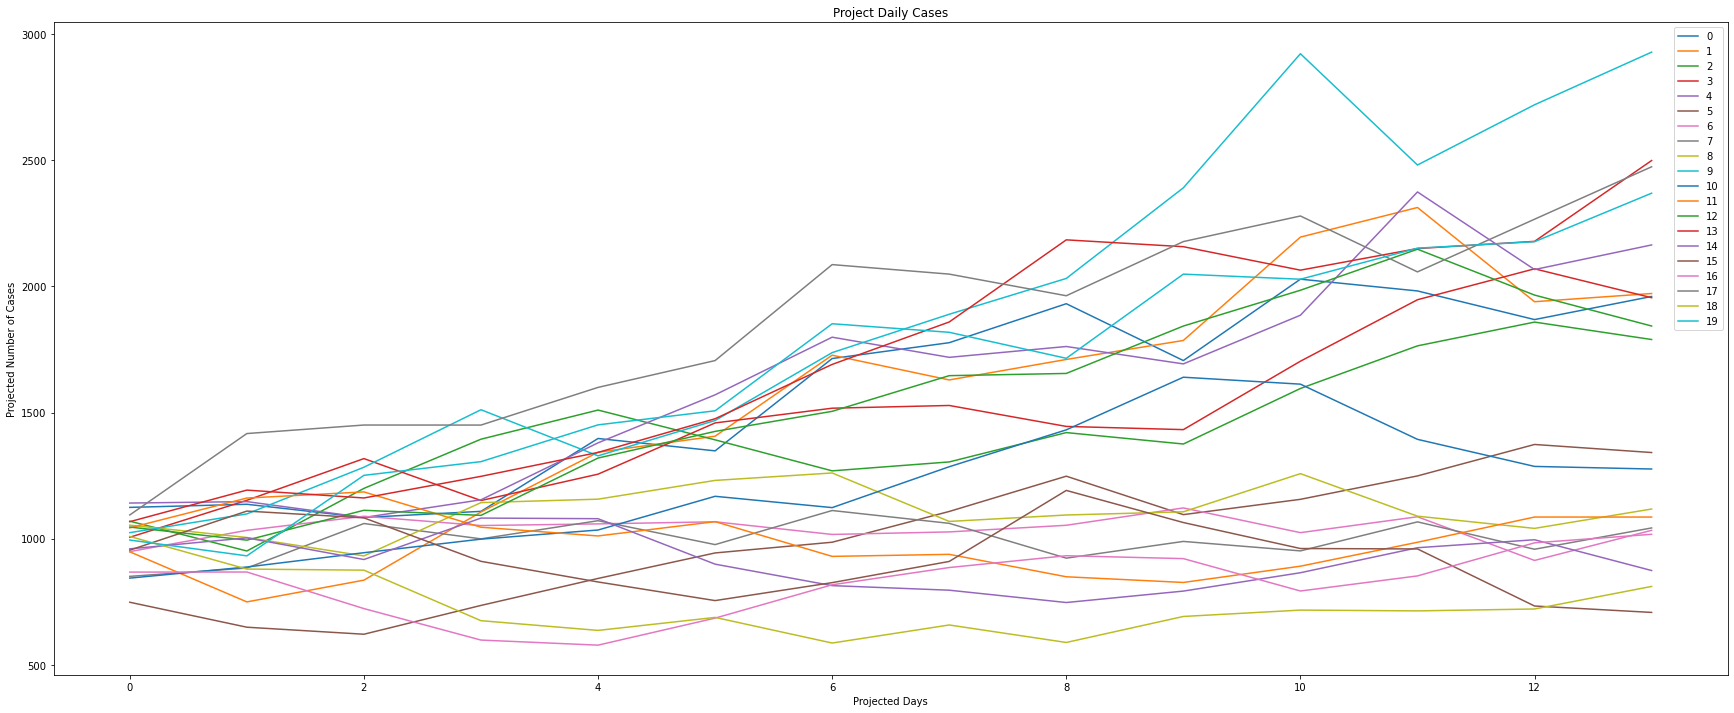

In [21]:
#Plot Projection Scenarios 
projection.plot(figsize=(30,12), title='Project Daily Cases').set(ylabel='Projected Number of Cases', xlabel='Projected Days')



In [23]:
#Worst Cast Scenario in 14 days 

projection.max().max()

2927.7363214633747

In [24]:
# Based on 30 days 

In [25]:
#Set variables for MC Sim 

projected_days = 30   #number of days to project out from last day of actual data

num_simulations = 20 #number of simulations required 


daily_changes = np.random.normal(mean_14,std_14,(projected_days,num_simulations))


In [26]:
#Create projection dataframe 
projection = pd.DataFrame((daily_changes + 1).cumprod(axis = 0) * 941)
projection

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,820.842948,887.196450,1068.378797,874.956099,1249.051003,631.812537,1128.596695,989.034471,1066.912771,885.230467,1095.760819,1001.705918,1037.646595,1138.526763,1105.976433,987.889460,956.149692,1019.218316,887.437794,940.378031
1,888.365205,993.283989,1146.384842,947.126416,1313.897692,667.372558,1217.669529,1271.570491,1108.266131,993.574491,1169.765847,931.997548,1025.197329,934.492468,1110.998187,1299.710980,1104.816877,1096.750096,806.489726,986.501359
2,900.864567,1049.794840,1246.108311,818.553814,1400.380535,669.773570,1327.631650,1419.547927,1146.391209,990.905188,1089.523181,1146.706319,1169.341421,870.911924,1069.866342,1322.140304,1138.537083,1120.471687,801.614456,1154.423670
3,947.926089,1269.119027,1262.321851,746.527287,1603.818889,806.481872,1423.568133,1538.681530,1231.849498,1081.690563,1075.669057,1385.860089,1331.471827,857.394893,1351.308966,1459.693133,1482.972846,1265.510878,851.749229,1365.331994
4,964.900820,1219.613584,1210.244982,838.233007,1704.211073,592.844074,1467.281003,1880.909971,1143.928641,1408.836015,1026.480077,1449.231053,1536.951324,1076.620425,1601.807513,1256.833504,1396.169613,1214.473254,863.544674,1597.966851
5,876.408157,1366.626670,1206.500673,707.627743,2037.247633,677.377861,1603.034471,1888.200144,1159.330666,1363.907722,930.343505,1483.328282,1641.197688,981.042077,1535.599445,1285.178602,1228.918520,1227.364852,815.808307,1641.977309
6,845.746335,1390.646928,1205.081816,851.634721,2030.215107,709.063484,1712.449372,2196.978024,1159.860227,1615.087051,1235.951004,1617.505736,1939.202176,1116.794308,1757.456120,1371.195713,1342.796457,1186.293965,741.924577,1269.017328
7,967.425513,1222.717932,1066.497112,895.049189,2251.531985,812.103028,1852.700326,2469.039324,1130.013460,1682.910922,1320.462079,1616.547755,1937.035549,981.813404,1990.249233,1263.148192,1362.671947,1301.829462,868.466816,1303.145230
8,1130.441737,1369.112837,1025.356315,991.222517,2161.365632,899.458344,2296.029292,2495.194383,1278.158249,1489.301905,1616.029017,1751.370075,2141.639353,1166.912850,1983.503601,1431.077134,1515.697681,1677.737894,906.324825,1119.226349
9,1203.169003,1177.247802,877.665567,1075.413828,2351.747059,913.539122,2056.505129,2814.720041,1738.237784,1538.580099,1657.621001,2164.744375,2274.157007,1086.753182,1887.943811,1550.129321,1650.987785,1622.774316,1011.834493,1383.155251


In [27]:
#Worst Cast Scenario in 30 days 

projection.max().max()

11908.30443914685

In [ ]:
#tried to animate the line graph but this did not work 

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import animation

# dt = 0.01
# tfinal = 1
# x0 = 0

# sqrtdt = np.sqrt(dt)
# n = int(tfinal/dt)
# xtraj = np.zeros(n+1, float)
# trange = np.linspace(start=0,stop=tfinal ,num=n+1)
# xtraj[0] = x0

# for i in range(n):
#     xtraj[i+1] = xtraj[i] + np.random.normal()

# x = trange
# y = xtraj

# # animation line plot example

# fig, ax = plt.subplots(1, 1, figsize = (6, 6))

# def animate(i):
#     ax.cla() # clear the previous image
#     ax.plot(x[:i], y[:i]) # plot the line
#     ax.set_xlim([x0, tfinal]) # fix the x axis
#     ax.set_ylim([1.1*np.min(y), 1.1*np.max(y)]) # fix the y axis

# anim = animation.FuncAnimation(fig, animate, frames = len(x) + 1, interval = 1, blit = False)
# plt.show()